### レンズ

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [58]:
import math
import RayMatrix as rmat
from Snell import snell
import importlib
importlib.reload(rmat)
#math.atan2?

<module 'RayMatrix' from '/Users/norifumi/Git/differential/RayMatrix.py'>

In [60]:
# 球面を描く
def plot_sphereL(R, plotm):
    x = []
    y = []
    ymax = 10.0
    if R < ymax:
        ymax = R
    # x^2 + y^2 = R^2
    cx = math.sqrt(R*R - ymax*ymax)
    for yi in range(-int(ymax*10), int(ymax*10)):
        yf = yi / 10.0
        x.append(-math.sqrt(R*R - yf*yf) + cx)
        y.append(yf)
    plotm.plot(x,y, 'b')
    plotm.plot(cx, 0, 'b.')

In [61]:
# 球面を描く
def plot_sphereR(R, plotm):
    x = []
    y = []
    ymax = 10.0
    if R < ymax:
        ymax = R
    # x^2 + y^2 = R^2
    cx = -math.sqrt(R*R - ymax*ymax)
    for yi in range(-int(ymax*10), int(ymax*10)):
        yf = yi / 10.0
        x.append(math.sqrt(R*R - yf*yf) + cx)
        y.append(yf)
    plotm.plot(x,y, 'b')
    plotm.plot(cx, 0, 'b.')

In [7]:
def lens_theta(R, y, n1, n2):
    if y < 0 or y > R:
        print("invalid y")
        return -999
    x = math.sqrt(R*R - y*y)
    angle = math.atan2(y, x)
    incid = angle
    refra = snell(n1, n2, incid)
    return - (math.radians(90) - refra)

In [8]:
# 屈折率n
#WATER_N = 1.333
GLASS_N = 1.5
AIR_N = 1.0

θ1:14.04, θ2:-0.19
frontFocus:40.00


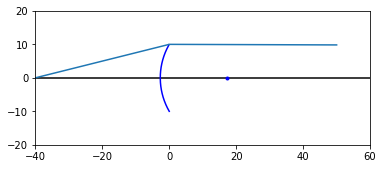

In [62]:
# 左側凸レンズ
R = 20
fFocus = rmat.focusLConvex(AIR_N, GLASS_N, R)
sx = -fFocus
y1  = 10
th1 = math.atan2(y1, -sx)
plot_sphereL(R, plt)

#plt.plot([-50, 0, 50], [y1, y1, y1 + 50*math.sin(lens_theta(R, y1, AIR_N, GLASS_N))])
y, th = rmat.refracLConvex(y1, th1, AIR_N, GLASS_N, R)
print("θ1:{0:.2f}, θ2:{1:.2f}".format(math.degrees(th1), math.degrees(th)))
print("frontFocus:{0:.2f}".format(fFocus))
plt.plot([sx, 0, 50], [0, y1, y1 + 50*math.sin(th)])

plt.xlim(-40, 60)
plt.ylim(-20, 20)
plt.hlines([0], -50, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

θ1:0.00, θ2:-9.55
rearFocus:60.00


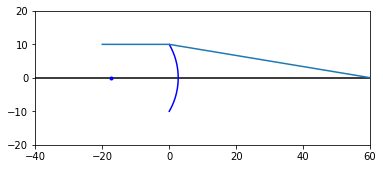

In [63]:
# 右側凸レンズ
R = 20
rFocus = rmat.focusRConvex(AIR_N, GLASS_N, R)
sx = -20
ex = rFocus
y1  = 10
th1 = 0.0
plot_sphereR(R, plt)

#plt.plot([-50, 0, 50], [y1, y1, y1 + 50*math.sin(lens_theta(R, y1, AIR_N, GLASS_N))])
y, th = rmat.refracRConvex(y1, th1, AIR_N, GLASS_N, R)
print("θ1:{0:.2f}, θ2:{1:.2f}".format(math.degrees(th1), math.degrees(th)))
print("rearFocus:{0:.2f}".format(rFocus))
plt.plot([sx, 0, ex], [y1, y1, y + ex*math.sin(th)])

plt.xlim(-40, 60)
plt.ylim(-20, 20)
plt.hlines([0], -50, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

focus:40.00
θ1:0.00, θ2:-14.32
θ1:-7.13, θ2:-7.13
θ1:-14.04, θ2:0.29


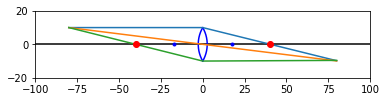

In [76]:
# 薄肉レンズ
R = 20
focus = rmat.focusLConvex(AIR_N, GLASS_N, R)
sx = -2*focus
ex = 2*focus
y1  = 10
th1 = 0.0
plot_sphereL(R, plt)
plot_sphereR(R, plt)
print("focus:{0:.2f}".format(focus))

# 平行入射光線
y, th = rmat.refracConvex(y1, th1, focus)
plt.plot([sx, 0, ex], [y1, y1, y + ex*math.sin(th)])
print("θ1:{0:.2f}, θ2:{1:.2f}".format(math.degrees(th1), math.degrees(th)))

# レンズ中心を通る光線
y, th = rmat.refracConvex(0.0, math.atan2(-y1, 2*focus), focus)
plt.plot([sx, 0, ex], [y1, 0.0, ex*math.sin(th)])
print("θ1:{0:.2f}, θ2:{1:.2f}".format(math.degrees(math.atan2(-y1, 2*focus)), math.degrees(th)))

# 焦点を通って入射する光線
y, th = rmat.refracConvex(-y1, math.atan2(-y1, focus), focus)
plt.plot([sx, 0, ex], [y1, -y1, -y1 + ex*math.sin(th)])
print("θ1:{0:.2f}, θ2:{1:.2f}".format(math.degrees(math.atan2(-y1, focus)), math.degrees(th)))

plt.plot([-focus, focus], [0, 0], 'ro')
plt.xlim(-100, 100)
plt.ylim(-20, 20)
plt.hlines([0], -100, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()